# Principal Component Analysis with Cancer Data

In [9]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [10]:
cancer_data = pd.read_csv('breast-cancer-wisconsin.data.txt',sep=',',names=['Sample code number',
 'Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size'
        ,'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])
cancer_data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [11]:
  # Id columns is to identify rows hence can be skipped in analysis
cancer_data.drop('Sample code number',inplace=True,axis=1)
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
#pca_cancer_data=cancer_data.iloc[:,0:-1]


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [12]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 51.9+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [13]:
# We could see "?" values in column, this should be removed from data set
temp = pd.DataFrame(cancer_data['Bare Nuclei'].str.isdigit()) 
temp[temp['Bare Nuclei']==False]
# Check for missing value in any other column
    

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [15]:
# No missing values found. So let us try to remove ? from bare nuclei column
cancer_data= cancer_data.replace('?',np.nan)
cancer_data['Bare Nuclei']=cancer_data['Bare Nuclei'].astype(float)
cancer_data = cancer_data.fillna(cancer_data.median())
#count of other rows if they have '?'
cancer_data[cancer_data=='?'].count()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

since the data has '?' have replaced the values with median

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


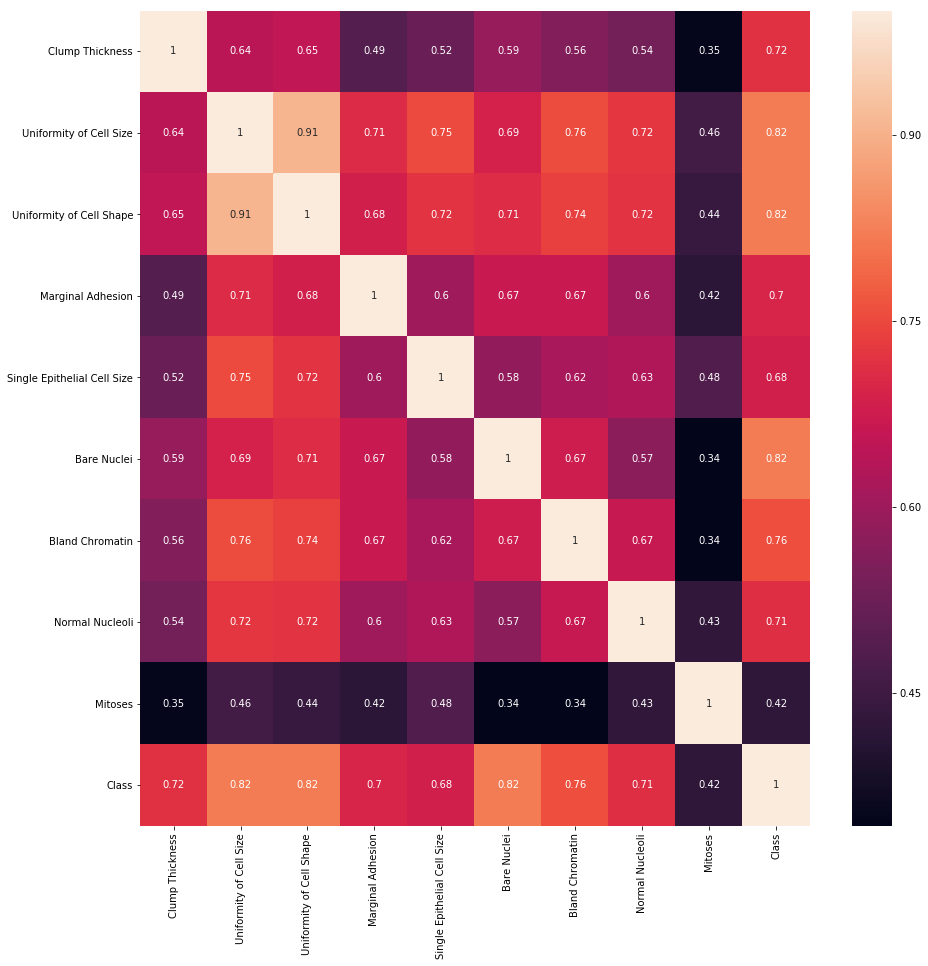

In [16]:
# Check for correlation of variable
from matplotlib import pyplot
pyplot.subplots(figsize = (15,15))
sns.heatmap(cancer_data.corr(),annot=True)

In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
# moitoses has comparitively weaker correlatin to all attributes compare to other attributes

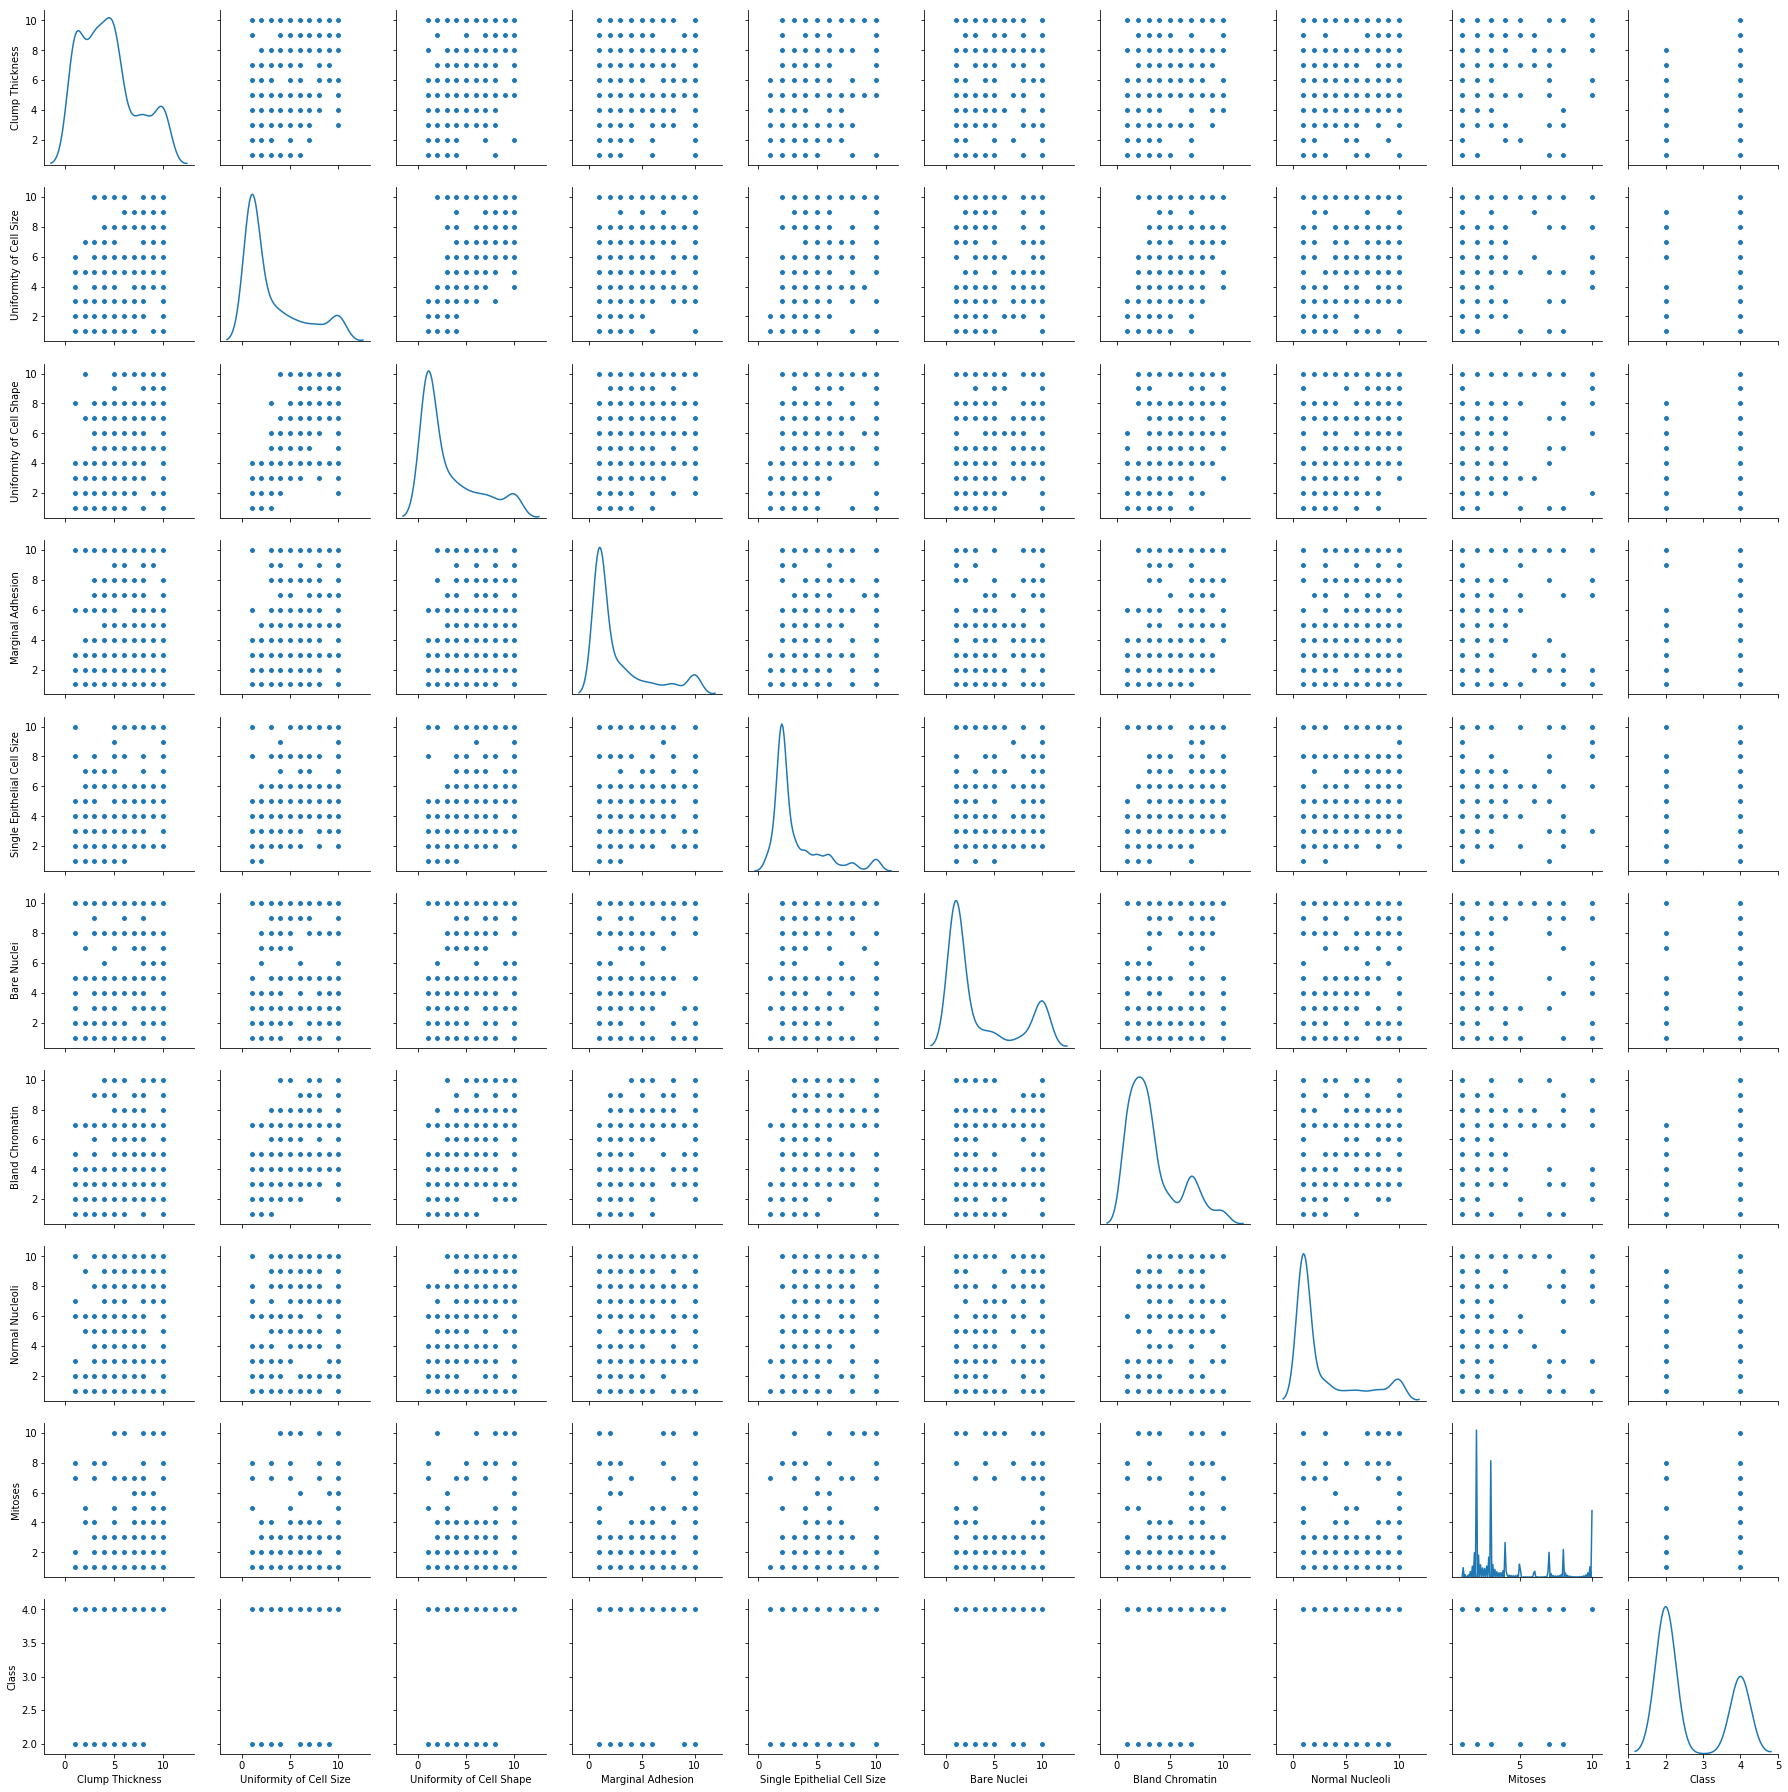

In [18]:
#Let us check for pair plots
sns.pairplot(cancer_data,diag_kind='kde')

from the above pair plot we can see that the distributions are right skewed and has more outliers. So outlier treatment has to be done.

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

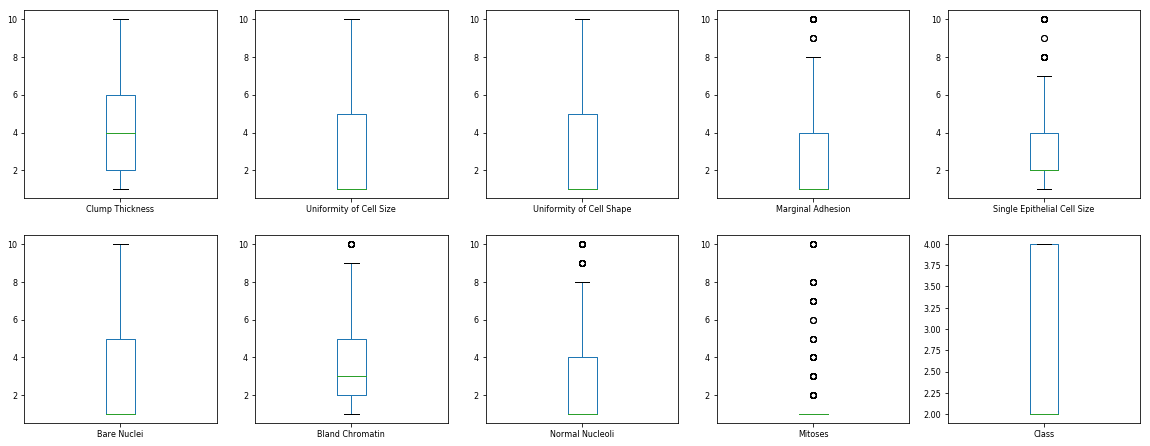

In [20]:

cancer_data.plot(kind='box', subplots=True, layout=(5,5) ,fontsize=8, figsize=(20,20))
pyplot.show()

from the above we can infere that we see many of the outliers in mitosis, normal nucleoli, bland chromatin,single epithelial
cell size, marginal adhesion. So treat the outliers by replacing them with median.

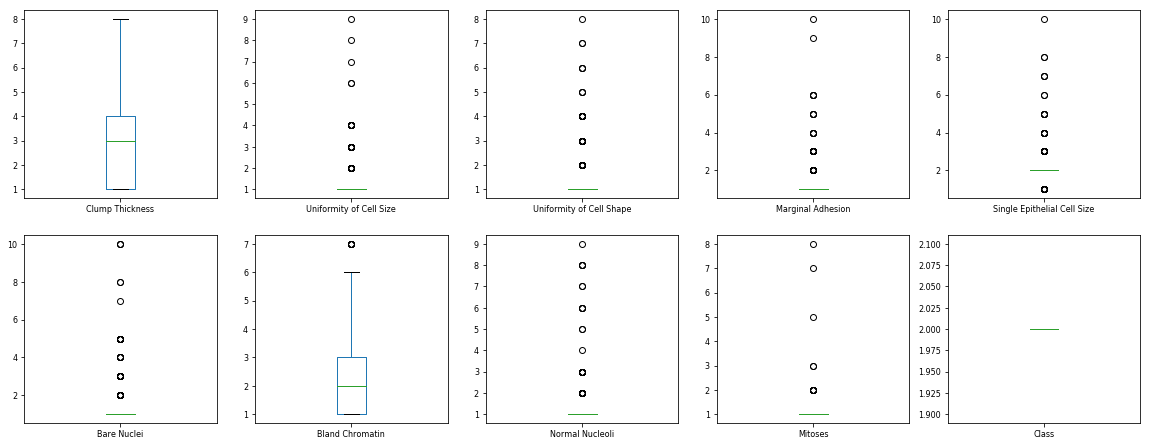

In [24]:
cancer_data[cancer_data['Class']==2].plot(kind='box', subplots=True, layout=(5,5) ,fontsize=8, figsize=(20,20))
pyplot.show()

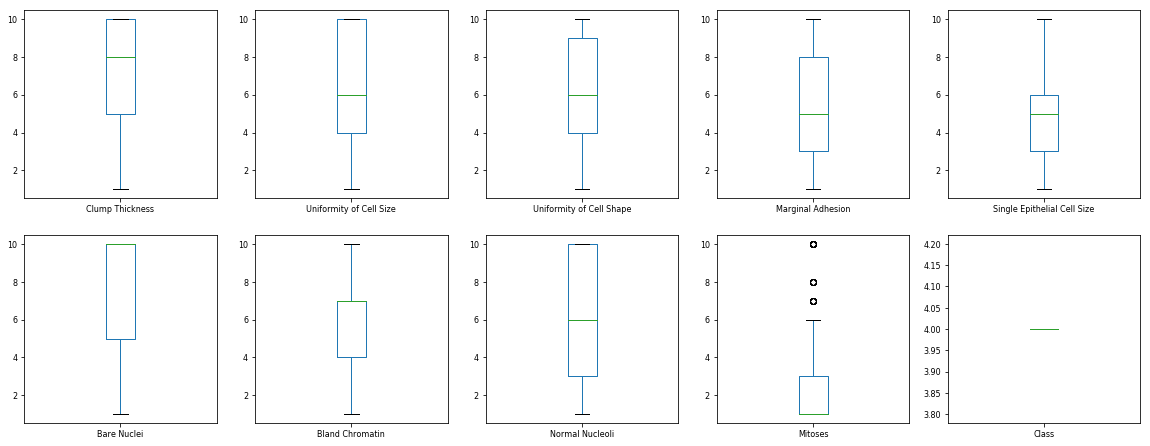

In [25]:
cancer_data[cancer_data['Class']==4].plot(kind='box', subplots=True, layout=(5,5) ,fontsize=8, figsize=(20,20))
pyplot.show()

But when we seperately analyse based on the class , according to the above box plots, most of the records uner class==2
are outliers. so we consider them to be not actual outliers

# Q6 Create a covariance matrix for identifying Principal components

In [26]:
# PCA
# Step 1 - Create covariance matrix
X = cancer_data.iloc[:,0:-1].values
y = cancer_data.iloc[:,-1].values
from sklearn.preprocessing import StandardScaler


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)

In [28]:
#TRANSFRM THE TRAIN SET AN TEST SET SEPERATELY
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [29]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00204918 0.6427667  0.65796437 0.46857177 0.51472692 0.58007454
  0.56416234 0.51914849 0.32296377]
 [0.6427667  1.00204918 0.91043389 0.70488408 0.74275024 0.68351267
  0.76257447 0.70227554 0.44716869]
 [0.65796437 0.91043389 1.00204918 0.6708164  0.70679256 0.69487879
  0.74286655 0.69849391 0.41368139]
 [0.46857177 0.70488408 0.6708164  1.00204918 0.59961577 0.62955063
  0.64220768 0.58078889 0.43751211]
 [0.51472692 0.74275024 0.70679256 0.59961577 1.00204918 0.57657155
  0.634409   0.62191394 0.47424065]
 [0.58007454 0.68351267 0.69487879 0.62955063 0.57657155 1.00204918
  0.67910613 0.55924167 0.32804854]
 [0.56416234 0.76257447 0.74286655 0.64220768 0.634409   0.67910613
  1.00204918 0.66059458 0.32789725]
 [0.51914849 0.70227554 0.69849391 0.58078889 0.62191394 0.55924167
  0.66059458 1.00204918 0.39309833]
 [0.32296377 0.44716869 0.41368139 0.43751211 0.47424065 0.32804854
  0.32789725 0.39309833 1.00204918]]


# Q7 Identify eigen values and eigen vector

In [30]:
# Step 2- Get eigen values and eigen vector
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.30274552 -0.216534    0.01401758 -0.83671722  0.02643305 -0.25207907
   0.08412646  0.17460692 -0.24363615]
 [-0.3838795  -0.05602652  0.74014535  0.0299197  -0.11759485  0.35508659
  -0.18985532 -0.29675311 -0.19174136]
 [-0.37851427 -0.11259197 -0.66279627 -0.0324559  -0.11903251  0.50061108
  -0.14392309 -0.30622944 -0.15629204]
 [-0.33061135  0.08778095 -0.05273308  0.40408238  0.48090193 -0.15551781
   0.1210774   0.26321185 -0.61443846]
 [-0.33867061  0.16223682 -0.06168658  0.12081478 -0.31009815 -0.26305597
  -0.69150552  0.41564517  0.15582005]
 [-0.33207974 -0.2256539   0.04988054 -0.00653525  0.56028024  0.257411
   0.04527005  0.2481795   0.62646291]
 [-0.35044386 -0.21996839 -0.0535192   0.19698913 -0.00117133 -0.62774402
   0.10134846 -0.57758594  0.22179501]
 [-0.33161774 -0.01217611  0.02103876  0.18534576 -0.56038015  0.07777934
   0.63946945  0.33786718  0.10924651]
 [-0.2250529   0.8965583  -0.01756307 -0.21650971  0.1262349  -0.00116754
   0.14860

In [31]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(5.825284588788154,
  array([-0.30274552, -0.3838795 , -0.37851427, -0.33061135, -0.33867061,
         -0.33207974, -0.35044386, -0.33161774, -0.2250529 ])),
 (0.8044518946676464,
  array([-0.216534  , -0.05602652, -0.11259197,  0.08778095,  0.16223682,
         -0.2256539 , -0.21996839, -0.01217611,  0.8965583 ])),
 (0.544254281665599,
  array([-0.83671722,  0.0299197 , -0.0324559 ,  0.40408238,  0.12081478,
         -0.00653525,  0.19698913,  0.18534576, -0.21650971])),
 (0.4727221629107694,
  array([ 0.02643305, -0.11759485, -0.11903251,  0.48090193, -0.31009815,
          0.56028024, -0.00117133, -0.56038015,  0.1262349 ])),
 (0.3777179991356092,
  array([ 0.08412646, -0.18985532, -0.14392309,  0.1210774 , -0.69150552,
          0.04527005,  0.10134846,  0.63946945,  0.14860067])),
 (0.3390018791374005,
  array([-0.24363615, -0.19174136, -0.15629204, -0.61443846,  0.15582005,
          0.62646291,  0.22179501,  0.10924651,  0.15508505])),
 (0.2978651032071191,
  array([ 0.17460692

In [32]:
eigvectors_sorted = [eigen_pairs[index][1] for index in range(len(e_vals))]

# Q8 Find variance and cumulative variance by each eigen vector

In [33]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
print("variance explained",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

variance explained [64.59302157074794, 8.920075541872553, 6.034903191384049, 5.2417272324575155, 4.188284107661374, 3.7589847084537893, 3.3028441346301745, 2.9945443800745153, 0.965615132718096]
Cumulative Variance Explained [ 64.59302157  73.51309711  79.5480003   84.78972754  88.97801164
  92.73699635  96.03984049  99.03438487 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

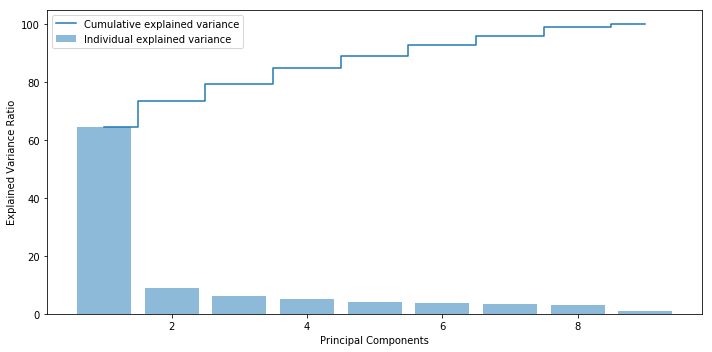

In [34]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

from the above plot we can see that the variace explained by the last princpal component is very less. So we can drop the
last principal component

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

principalComponents = pca.fit_transform(X_train_sd)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4',
                         'principal component 5','principal component 6','principal component 7','principal component 8'])


In [36]:
principalDf.shape

(489, 8)

In [37]:
X_train_sd.shape

(489, 9)

In [38]:
#pc components using linear algebra:

In [39]:
P_reduce = np.array(eigvectors_sorted[0:8])
P_reduce

array([[-0.30274552, -0.3838795 , -0.37851427, -0.33061135, -0.33867061,
        -0.33207974, -0.35044386, -0.33161774, -0.2250529 ],
       [-0.216534  , -0.05602652, -0.11259197,  0.08778095,  0.16223682,
        -0.2256539 , -0.21996839, -0.01217611,  0.8965583 ],
       [-0.83671722,  0.0299197 , -0.0324559 ,  0.40408238,  0.12081478,
        -0.00653525,  0.19698913,  0.18534576, -0.21650971],
       [ 0.02643305, -0.11759485, -0.11903251,  0.48090193, -0.31009815,
         0.56028024, -0.00117133, -0.56038015,  0.1262349 ],
       [ 0.08412646, -0.18985532, -0.14392309,  0.1210774 , -0.69150552,
         0.04527005,  0.10134846,  0.63946945,  0.14860067],
       [-0.24363615, -0.19174136, -0.15629204, -0.61443846,  0.15582005,
         0.62646291,  0.22179501,  0.10924651,  0.15508505],
       [ 0.17460692, -0.29675311, -0.30622944,  0.26321185,  0.41564517,
         0.2481795 , -0.57758594,  0.33786718, -0.19047137],
       [-0.25207907,  0.35508659,  0.50061108, -0.15551781, -0

In [40]:
X_train_sd_8d = np.dot(X_train_sd,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_train_sd_8d)
Proj_data_df

,0,1,2,3,4,5,6,7
0,-4.028355,-1.548244,0.295411,-0.492427,0.970696,0.699357,-0.100335,-0.194814
1,1.714253,0.002240,0.045786,-0.045341,0.014780,0.099478,-0.258477,-0.357174
2,-3.891970,4.373830,-1.712165,1.066157,-0.674693,-2.260847,-0.846719,0.339106
3,-2.010361,-1.171968,-0.076004,0.026468,0.779612,0.256263,-0.416425,-0.128005
4,-1.524964,0.165293,-0.879107,0.280767,-0.292719,1.849920,0.579842,-0.363632
5,0.923004,-0.114885,-0.068391,0.305575,-0.102299,-0.557732,-0.104794,0.382962
6,1.857370,0.092072,-0.034662,-0.044863,-0.026610,0.008900,-0.022599,-0.100812
7,1.048106,0.256389,0.063756,0.691798,-0.099616,-1.277558,0.989145,-0.416151
8,2.114750,0.096900,0.208295,0.083206,0.250054,0.026176,-0.268687,0.105102
9,-2.836281,1.075793,-0.120569,1.473117,0.913790,0.670433,0.002084,-0.775829


# Q10 Find correlation between components and features

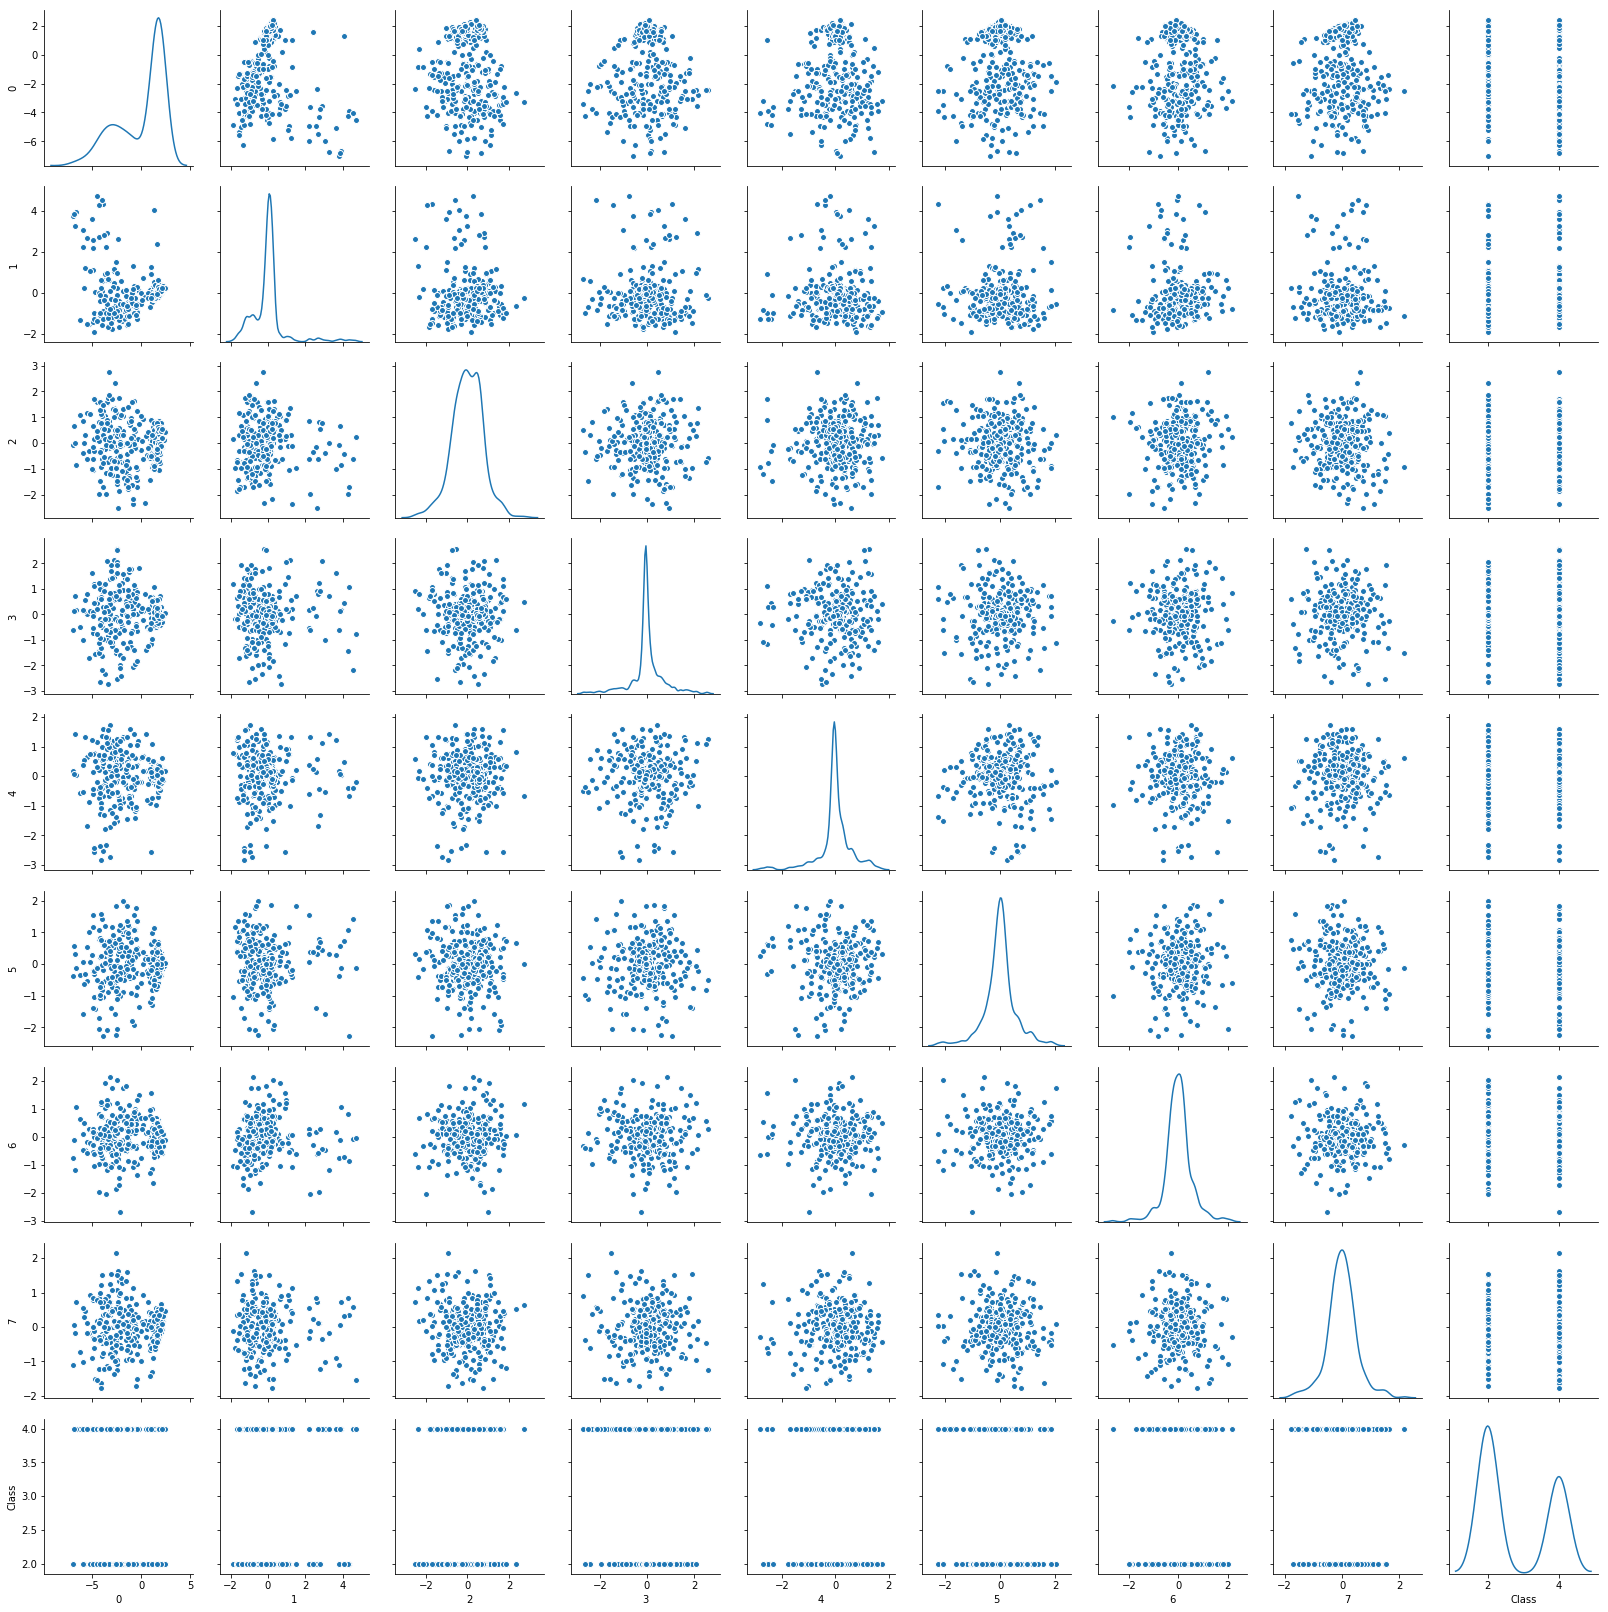

In [41]:
#Let us check it visually
Proj_data_mpg_df = Proj_data_df.join(cancer_data['Class'])

sns.pairplot(Proj_data_mpg_df, diag_kind='kde')

In [42]:
Proj_data_mpg_df.corr()

,0,1,2,3,4,5,6,7,Class
0,1.000000e+00,-5.601560e-17,-3.539245e-17,-5.784820e-16,1.610797e-16,-2.657490e-16,2.977552e-16,-1.110519e-15,-0.098844
1,-5.601560e-17,1.000000e+00,-1.183021e-15,1.768531e-16,3.016732e-16,-3.856606e-16,-2.645076e-16,-3.495886e-16,0.014492
2,-3.539245e-17,-1.183021e-15,1.000000e+00,-2.241503e-16,1.712921e-16,-1.637941e-16,9.833119e-16,-3.874349e-17,0.049268
3,-5.784820e-16,1.768531e-16,-2.241503e-16,1.000000e+00,6.945000e-16,-6.368640e-16,-7.955989e-16,1.196045e-15,-0.034868
4,1.610797e-16,3.016732e-16,1.712921e-16,6.945000e-16,1.000000e+00,1.040550e-15,-2.123465e-15,2.684030e-15,-0.063668
5,-2.657490e-16,-3.856606e-16,-1.637941e-16,-6.368640e-16,1.040550e-15,1.000000e+00,1.893316e-15,1.234582e-15,-0.084460
6,2.977552e-16,-2.645076e-16,9.833119e-16,-7.955989e-16,-2.123465e-15,1.893316e-15,1.000000e+00,-5.934933e-15,0.040528
7,-1.110519e-15,-3.495886e-16,-3.874349e-17,1.196045e-15,2.684030e-15,1.234582e-15,-5.934933e-15,1.000000e+00,0.072435
Class,-9.884445e-02,1.449247e-02,4.926788e-02,-3.486762e-02,-6.366792e-02,-8.446027e-02,4.052761e-02,7.243519e-02,1.000000


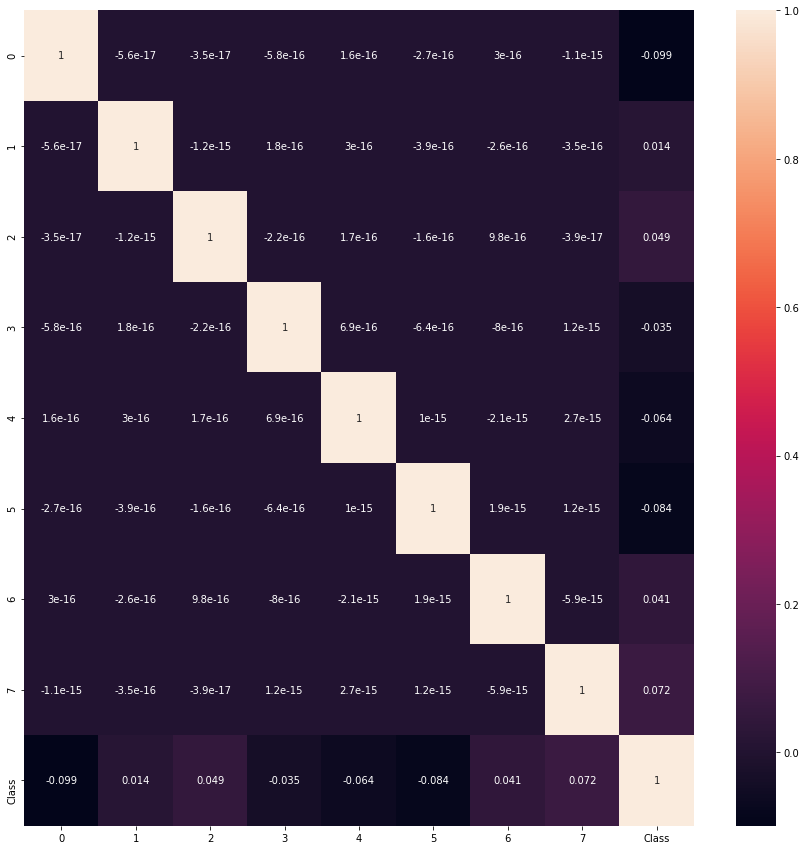

In [43]:
from matplotlib import pyplot
pyplot.subplots(figsize = (15,15))
sns.heatmap(Proj_data_mpg_df.corr(),annot=True)

from the above correlation matrix, we can see that the correlation between the components is negligible. They have become 
independant. Hence by applying PCA it is clear that the variables become independant and the colinearity between them decreases 
There is no significant correlation for the components with the target variables.

# Content Based Recommendation System

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [177]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [178]:
jokes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24983 entries, 0 to 24982
Columns: 101 entries, NumJokes to Joke100
dtypes: float64(100), int64(1)
memory usage: 19.3 MB


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [179]:
ratings=jokes_df.head(200)
ratings

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q22 Change the column indices from 0 to 99

In [180]:
ratings_temp=pd.DataFrame(ratings.iloc[:,1:102])
ratings_temp.columns= list(range(100))
ratings_temp.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [181]:
ratings.iloc[:,1:102].columns = list(range(100))

In [182]:
ratings.drop(ratings.iloc[:,1:102].columns,axis=1,inplace=True )

C:\Users\Sri Harika\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [183]:
ratings_final=ratings.join(ratings_temp)
ratings_final.shape

(200, 101)

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [220]:
ratings_final.replace(99.00,0,inplace=True)
ratings_final

,NumJokes,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [187]:
ratings_final[ratings_final==99.00].count()

NumJokes    0
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
           ..
70          0
71          0
72          0
73          0
74          0
75          0
76          0
77          0
78          0
79          0
80          0
81          0
82          0
83          0
84          0
85          0
86          0
87          0
88          0
89          0
90          0
91          0
92          0
93          0
94          0
95          0
96          0
97          0
98          0
99          0
Length: 101, dtype: int64

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [206]:
from sklearn.preprocessing import StandardScaler
ratings_diff =StandardScaler().fit_transform(ratings_final)
pd.DataFrame(ratings_diff)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.178514,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,1.371667,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.968748,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-1.014639,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,0.958652,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133
5,1.371667,-1.490063,-0.843136,0.045369,-2.023513,-1.301062,-1.286999,-1.578608,-0.161811,-1.655217,...,-1.403455,-2.232467,-0.575275,-1.038043,-0.835272,-1.266839,-0.217896,-2.629557,-1.591755,-1.219861
6,-1.060529,-0.117881,-0.121130,-0.053284,0.181880,1.591786,-2.548886,1.344707,1.830154,-0.004146,...,-0.192459,-0.055329,-0.362193,-0.184043,-0.175922,0.643062,-0.233349,-0.026858,-0.041444,-0.160954
7,1.371667,1.403307,0.523373,2.002748,-1.429354,-1.498469,-0.689143,1.620828,0.308342,-1.292726,...,2.280845,-0.409232,-0.393528,-1.822800,-1.131677,-1.266839,0.428065,-0.041190,0.360716,-0.160954
8,1.371667,-0.960761,-0.843136,-2.165370,-1.605786,-1.605475,-0.367396,-0.972924,-1.823844,-1.955637,...,1.302470,-0.146965,0.944503,-0.267712,-0.263634,-0.237914,-0.322980,-0.109984,-1.085217,-1.680255
9,0.086733,0.551531,0.929247,1.101412,0.962849,1.189591,0.873954,1.560259,0.537233,0.743180,...,-0.192459,1.357125,-0.362193,-0.184043,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954


# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [210]:
ratings_1=pd.DataFrame(ratings_diff)
mean
for i in ratings_1.iloc[:,1:102].columns:
    mean.append(ratings_diff[i].mean())

In [225]:
mean

0.14172976818000751

In [231]:
mean_pairs = [(ratings_diff[i].mean(),i) for i in ratings_1.iloc[:,1:102].columns]
mean_pairs.sort(reverse=True)
mean_pairs

[(1.0366636332903523, 94),
 (1.01843503908544, 44),
 (0.9887778754956082, 86),
 (0.8840558965973427, 13),
 (0.7803781650022952, 17),
 (0.7586457425881994, 73),
 (0.7422522396610123, 46),
 (0.634392008002135, 34),
 (0.5883152877737818, 36),
 (0.5840779264871097, 38),
 (0.5820131165823406, 2),
 (0.5811158049266433, 60),
 (0.5554578728204819, 1),
 (0.5444144135730299, 9),
 (0.5442088773343944, 4),
 (0.5310606201796171, 89),
 (0.466354158545773, 50),
 (0.44096614204995394, 25),
 (0.40210819473558684, 100),
 (0.3486472246506151, 77),
 (0.34854240590548585, 12),
 (0.3293390214876026, 67),
 (0.3075364424132758, 78),
 (0.29720660410444766, 65),
 (0.28327548658147, 6),
 (0.2815855182376914, 93),
 (0.2504981687500325, 74),
 (0.2315089245027051, 22),
 (0.226355062017341, 84),
 (0.19885197224291432, 59),
 (0.17642627300130118, 42),
 (0.16705130244894517, 32),
 (0.16257899790511637, 23),
 (0.15909711754489986, 70),
 (0.13594344336909617, 76),
 (0.12688740944347862, 30),
 (0.11471502298016874, 10),


In [232]:
mean_pairs[0:10]

[(1.0366636332903523, 94),
 (1.01843503908544, 44),
 (0.9887778754956082, 86),
 (0.8840558965973427, 13),
 (0.7803781650022952, 17),
 (0.7586457425881994, 73),
 (0.7422522396610123, 46),
 (0.634392008002135, 34),
 (0.5883152877737818, 36),
 (0.5840779264871097, 38)]

In [233]:
columns =jokes_df.iloc[:,1:102].columns
columns

Index(['Joke1', 'Joke2', 'Joke3', 'Joke4', 'Joke5', 'Joke6', 'Joke7', 'Joke8',
       'Joke9', 'Joke10', 'Joke11', 'Joke12', 'Joke13', 'Joke14', 'Joke15',
       'Joke16', 'Joke17', 'Joke18', 'Joke19', 'Joke20', 'Joke21', 'Joke22',
       'Joke23', 'Joke24', 'Joke25', 'Joke26', 'Joke27', 'Joke28', 'Joke29',
       'Joke30', 'Joke31', 'Joke32', 'Joke33', 'Joke34', 'Joke35', 'Joke36',
       'Joke37', 'Joke38', 'Joke39', 'Joke40', 'Joke41', 'Joke42', 'Joke43',
       'Joke44', 'Joke45', 'Joke46', 'Joke47', 'Joke48', 'Joke49', 'Joke50',
       'Joke51', 'Joke52', 'Joke53', 'Joke54', 'Joke55', 'Joke56', 'Joke57',
       'Joke58', 'Joke59', 'Joke60', 'Joke61', 'Joke62', 'Joke63', 'Joke64',
       'Joke65', 'Joke66', 'Joke67', 'Joke68', 'Joke69', 'Joke70', 'Joke71',
       'Joke72', 'Joke73', 'Joke74', 'Joke75', 'Joke76', 'Joke77', 'Joke78',
       'Joke79', 'Joke80', 'Joke81', 'Joke82', 'Joke83', 'Joke84', 'Joke85',
       'Joke86', 'Joke87', 'Joke88', 'Joke89', 'Joke90', 'Joke91', 'Joke92'

In [234]:
print("-------Top 10 recommended joke Id's----------")

for mean,i in mean_pairs[0:10]:
    print(columns[i])

-------Top 10 recommended joke Id's----------
Joke95
Joke45
Joke87
Joke14
Joke18
Joke74
Joke47
Joke35
Joke37
Joke39
